## Final Project Submission

Please fill out:
* Student name: Reuben Hough
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Ahbineet Kulkarni
* Blog post URL:


In [1]:
# Importing useful libraries
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
%matplotlib inline

C:\Users\reube\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
# Reading training dataset that was retrieved from kaggle
trainset = pd.read_csv('Tan_Train.csv', low_memory=False)
testset = pd.read_csv('Tan_Test.csv', low_memory=False)
labels = pd.read_csv('Tan_Labels.csv')
trainset.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
# A lot of info is chopped off, so I'm making a
# function that doesn't cut off any columns
def display_all(df):
    with pd.option_context('display.max_rows', 1000):
        with pd.option_context('display.max_columns', 1000):
            display(df)

In [4]:
display_all(trainset.head())

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
print(trainset.shape)
print(labels.shape)

(59400, 40)
(59400, 2)


The status labels can be added to the training set using the id code

In [6]:
df = trainset.merge(labels, on="id")

In [7]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [8]:
strings = ['funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region',
          'lga', 'ward', 'recorded_by', 'scheme_management',
          'scheme_name', 'extraction_type', 'extraction_type_group',
          'extraction_type_class', 'management', 'management_group', 'payment',
          'payment_type','water_quality', 'quality_group', 'source', 'source_type',
          'source_class', 'waterpoint_type']

In [9]:
# make all string columns lower case to compare and group them
for column in strings:
    df[column] = df[column].str.lower()
    testset[column] = testset[column].str.lower()

In [10]:
# isolate the year from date recorded
df['date_recorded']=pd.to_datetime(df.date_recorded)
df['year']=df.date_recorded.dt.year
df['month']=df.date_recorded.dt.month
df['day']=df.date_recorded.dt.day

testset['date_recorded']=pd.to_datetime(testset.date_recorded)
testset['year']=testset.date_recorded.dt.year
testset['month']=testset.date_recorded.dt.month
testset['day']=testset.date_recorded.dt.day

df['year'].value_counts(dropna=False)

2011    28674
2013    24271
2012     6424
2004       30
2002        1
Name: year, dtype: int64

There are very few dates before 2011, so I'm going to replace the date with 2011, the year with the most data.

In [11]:
df2 = df.copy() # Leaving a copy of the original dataframe
df2.drop(['date_recorded'], axis=1, inplace=True)
df2['year'] = df2['year'].where(df2['year'] > 2010, 2011)

testset2 = testset.copy()
testset2.drop(['date_recorded'], axis=1, inplace=True)
testset2['year'] = testset2['year'].where(testset2['year'] > 2010, 2011)

In [12]:
#function fills NaN values with a random number in interval
def clean(dataframe, column, l, h):
        array = np.random.uniform(low=l, high=h, size=dataframe.shape[0])
        dataframe['{}'.format(column)]=dataframe['{}'.format(column)].mask(pd.isnull, array)

In [13]:
# Function to encode column into integer values
def encode(dataframes, column):
    for x in dataframes:
        le = LabelEncoder().fit(x['{}'.format(column)])
        x['{}'.format(column)] = le.transform(x['{}'.format(column)])

In [14]:
# Function to replace numbers below a certain value with NaN
def replacemore(dataframes, column, number):
    for x in dataframes:
        x['{}'.format(column)] = x['{}'.format(column)].where(x['{}'.format(column)] > number, np.NaN)
def replaceless(dataframes, column, number):
    for x in dataframes:
        x['{}'.format(column)] = x['{}'.format(column)].where(x['{}'.format(column)] < number, np.NaN)

In [15]:
# Replaces 'unknown' with NaN
def unknown(dataframes, columns):
    for x in dataframes:
        for y in columns:
            x['{}'.format(y)] = x['{}'.format(y)].replace([0, 'Unknown', 'unknown', 'none'], np.nan)

In [16]:
cleaneddf = df2.copy()
cleantest = testset2.copy()

In [17]:
alldfs = [testset2, df2, cleaneddf, cleantest]

In [18]:
unknowns = ['water_quality', 'management', 'scheme_management', 'quantity', 'source_class']

In [19]:
unknown([df2, testset2], unknowns)

In [20]:
# Listing columns to encode
toencode = ['basin', 'waterpoint_type', 'payment', 'management', 'extraction_type_class', 'lga']

In [21]:
# Encodes columns that could use it
for col in toencode:
    encode([cleaneddf, cleantest], col)

In [22]:
# This function will create a histogram of the selected column and return mean and median values
def avgplot(dataframe, column, b):
    mean = dataframe['{}'.format(column)].mean()
    median = dataframe['{}'.format(column)].median()
    dataframe['{}'.format(column)].plot(kind='hist', bins=b)

    print("Mean Value for {} column: {}".format(column, mean))
    print("Median Value for {} column: {}".format(column, median))

Mean Value for construction_year column: 1996.8146855857951
Median Value for construction_year column: 2000.0


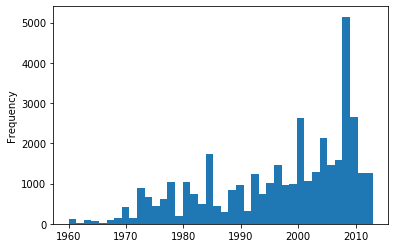

In [23]:
# Plots the known well construction years
# There are too many zeros for this information to be useful
df3 = cleaneddf.copy()
df3['construction_year'] = df3['construction_year'].where(df2['construction_year'] != 0)
avgplot(df3, 'construction_year', 40)

Many of the columns are difficult or impossible to use for one reason or another, or they are highly correlated with other columns, so I am going to drop them.

In [24]:
drop = ['amount_tsh', 'waterpoint_type_group', 'num_private', 'subvillage', 'quantity_group', 'payment_type',
       'management_group', 'extraction_type', 'extraction_type_group', 'scheme_name', 'recorded_by', 'ward',
       'district_code', 'construction_year', 'wpt_name','quality_group', 'region', 'scheme_management']

In [25]:
for x in alldfs:
    x.drop(drop, axis=1, inplace=True)

Tanzania has latitude from ~ -11 to ~ -1.1 and longitude from ~30 to ~40. Values outside that range are in error.

In [26]:
replaceless(alldfs, 'latitude', -0.00000002)
clean(cleaneddf, 'latitude', -11, -1.2)
clean(cleantest, 'latitude', -11, -1.2)

In [27]:
# replacemore(alldfs, 'longitude', 20)
# clean(cleaneddf, 'longitude', 29.7, 40.3)
# clean(cleantest, 'longitude', 29.7, 40.3)

Randomizing the lat and long made for a funny looking map, so I'm going to randomize the lat then set to the nearest long

In [28]:
longtraintrain = cleaneddf[cleaneddf.longitude > 20].loc[ : ,['id','longitude', 'latitude']]
longtraintest = cleaneddf[cleaneddf.longitude <= 20].loc[ : ,['id','longitude', 'latitude']]

longtesttrain = cleantest[cleantest.longitude > 20].loc[ : ,['id','longitude', 'latitude']]
longtesttest = cleantest[cleantest.longitude <= 20].loc[ : ,['id','longitude', 'latitude']]

In [29]:
replacemore(alldfs, 'longitude', 20)

In [30]:
longytraintrain = longtraintrain['longitude']
longxtraintrain = longtraintrain.copy()
longxtraintrain.drop(['id','longitude'], axis=1, inplace=True)
longytraintest = longtraintest.loc[ : ,['id','longitude']]
longxtraintest = longtraintest.copy()
longxtraintest.drop(['id','longitude'], axis=1, inplace=True)

In [31]:
longytesttrain = longtesttrain['longitude']
longxtesttrain = longtesttrain.copy()
longxtesttrain.drop(['id','longitude'], axis=1, inplace=True)
longytesttest = longtesttest.loc[ : ,['id','longitude']]
longxtesttest = longtesttest.copy()
longxtesttest.drop(['id','longitude'], axis=1, inplace=True)

Running K nearest neighbors to find the nearest longitude

In [32]:
clf1 = KNeighborsRegressor(n_neighbors=1, weights='distance').fit(longxtraintrain, longytraintrain)
clf2 = KNeighborsRegressor(n_neighbors=1, weights='distance').fit(longxtesttrain, longytesttrain)

longytraintest['longitude'] = clf1.predict(longxtraintest)
longytesttest['longitude'] = clf2.predict(longxtesttest)

In [33]:
cleaneddf['longitude'] = cleaneddf['longitude'].fillna(longytraintest['longitude'])
cleantest['longitude'] = cleantest['longitude'].fillna(longytesttest['longitude'])

It's unlikely that wells exist at sea level. They would have to be at the coast, as no other point in Tanzania is at or below sea level. They wouldn't need a well if they were on the beach. I think GPS is worth looking into so I'll spend more time on it.

In [34]:
# This defines dataframes with GPS Coordinates and without

gpstraintrain = cleaneddf[cleaneddf.gps_height > 3].loc[ : ,['id','longitude', 'latitude','gps_height']]
gpstraintest = cleaneddf[cleaneddf.gps_height <= 3].loc[ : ,['id','longitude', 'latitude','gps_height']]

gpstesttrain = cleantest[cleantest.gps_height > 3].loc[ : ,['id','longitude', 'latitude','gps_height']]
gpstesttest = cleantest[cleantest.gps_height <= 3].loc[ : ,['id','longitude', 'latitude','gps_height']]

In [35]:
# removing incorrect gps heights so they can be replaced
replacemore(alldfs, 'gps_height', 3)

In [36]:
ytraintrain = gpstraintrain['gps_height']
xtraintrain = gpstraintrain.copy()
xtraintrain.drop(['id','gps_height'], axis=1, inplace=True)
ytraintest = gpstraintest.loc[ : ,['id','gps_height']]
xtraintest = gpstraintest.copy()
xtraintest.drop(['id','gps_height'], axis=1, inplace=True)

In [37]:
ytesttrain = gpstesttrain['gps_height']
xtesttrain = gpstesttrain.copy()
xtesttrain.drop(['id','gps_height'], axis=1, inplace=True)
ytesttest = gpstesttest.loc[ : ,['id','gps_height']]
xtesttest = gpstesttest.copy()
xtesttest.drop(['id','gps_height'], axis=1, inplace=True)

K nearest neighbors makes sense here to fit missing gps heights to the height of nearby wells

In [38]:
clf3 = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(xtraintrain, ytraintrain)
clf4 = KNeighborsClassifier(n_neighbors=3, weights='distance').fit(xtesttrain, ytesttrain)

In [39]:
ytraintest['gps_height'] = clf3.predict(xtraintest)
ytesttest['gps_height'] = clf4.predict(xtesttest)

In [40]:
cleaneddf['gps_height'] = cleaneddf['gps_height'].fillna(ytraintest['gps_height'])
cleantest['gps_height'] = cleantest['gps_height'].fillna(ytesttest['gps_height'])

In [41]:
# This function will make a 3d graph of the tanzanian wells
def graph3d(df):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs=df.loc[df.status_group.isin(['functional']),'latitude'],
               ys=df.loc[df.status_group.isin(['functional']),'longitude'],
               zs=df.loc[df.status_group.isin(['functional']),'gps_height'],
               c='green', marker='.', alpha=0.15, s=20, label='functional')
    ax.scatter(xs=df.loc[df.status_group.isin(['non functional']),'latitude'],
               ys=df.loc[df.status_group.isin(['non functional']),'longitude'],
               zs=df.loc[df.status_group.isin(['non functional']),'gps_height'],
               c='blue', marker='x', alpha=0.75, s=34, label='non functional')
    ax.scatter(xs=df.loc[df.status_group.isin(['functional needs repair']),'latitude'],
               ys=df.loc[df.status_group.isin(['functional needs repair']),'longitude'],
               zs=df.loc[df.status_group.isin(['functional needs repair']),'gps_height'],
               c='red', marker='+', alpha=0.8, s=21, label='functional needs repair')
    ax.set_xlabel('latitude, South <--> North')
    ax.set_ylabel('longitude, East <--> West')
    ax.set_zlabel('pump height above sea level')
    ax.legend()
    ax.set_title('3D Plot of Water Pump Heights by Tanzanian Latitudes and Longitudes')

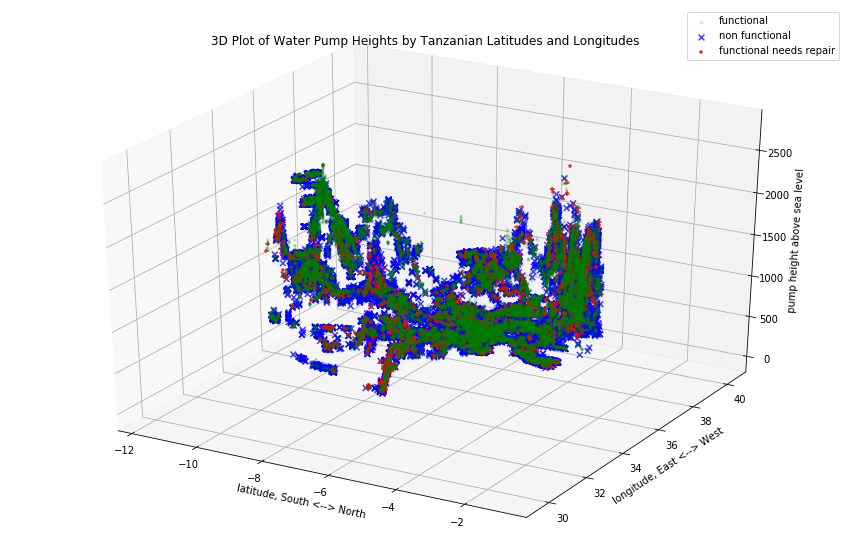

In [42]:
graph3d(cleaneddf)

A 2D graph would probably be more visually friendly in this case.

C:\Users\reube\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\reube\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\reube\Anaconda3\envs\learn-env\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


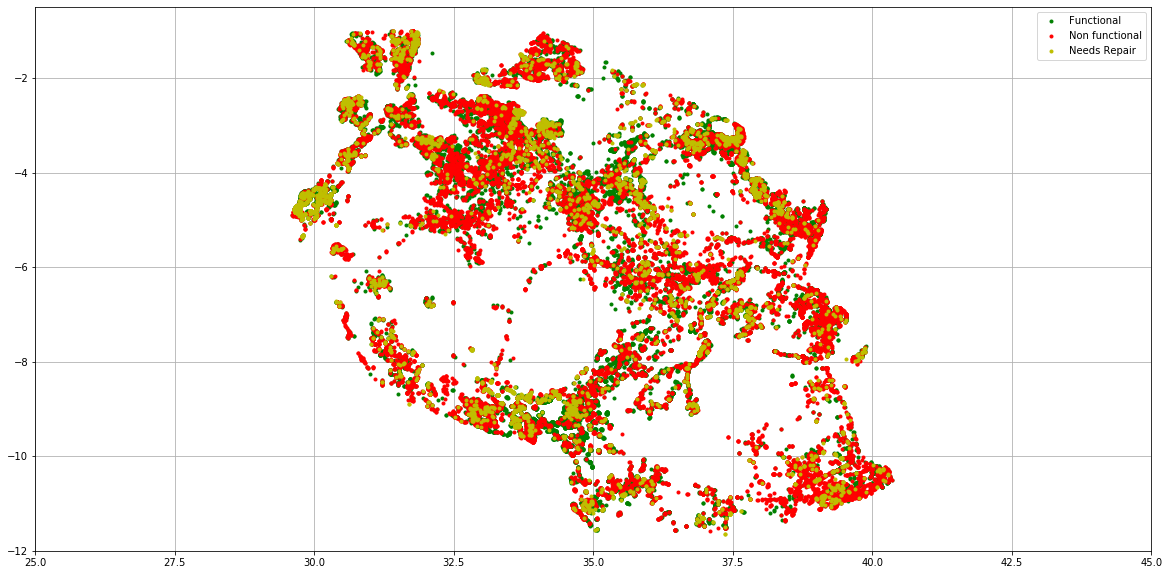

In [43]:
functional = cleaneddf[cleaneddf['status_group']=='functional']
nonfunctional = cleaneddf[cleaneddf['status_group']=='non functional']
needs = cleaneddf[cleaneddf['status_group']=='functional needs repair']

plt.figure(figsize=(20,10))
plt.plot(functional.longitude,functional.latitude,'g.')
plt.plot(nonfunctional.longitude,nonfunctional.latitude,'r.')
plt.plot(needs.longitude,needs.latitude,'y.')
plt.legend(['Functional','Non functional','Needs Repair'])
plt.axis([25,45,-12,-0.5])
plt.grid(True)

The functional and non-functional wells seem to be evenly distributed visually

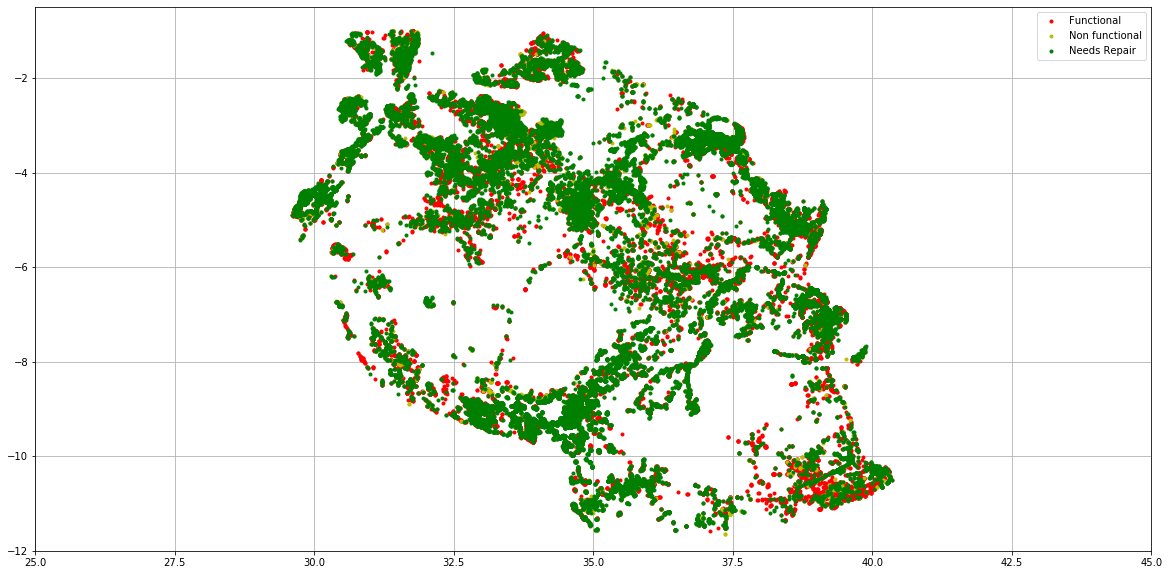

In [44]:
plt.figure(figsize=(20,10))
plt.plot(nonfunctional.longitude,nonfunctional.latitude,'r.')
plt.plot(needs.longitude,needs.latitude,'y.')
plt.plot(functional.longitude,functional.latitude,'g.')
plt.legend(['Functional','Non functional','Needs Repair'])
plt.axis([25,45,-12,-0.5])
plt.grid(True)

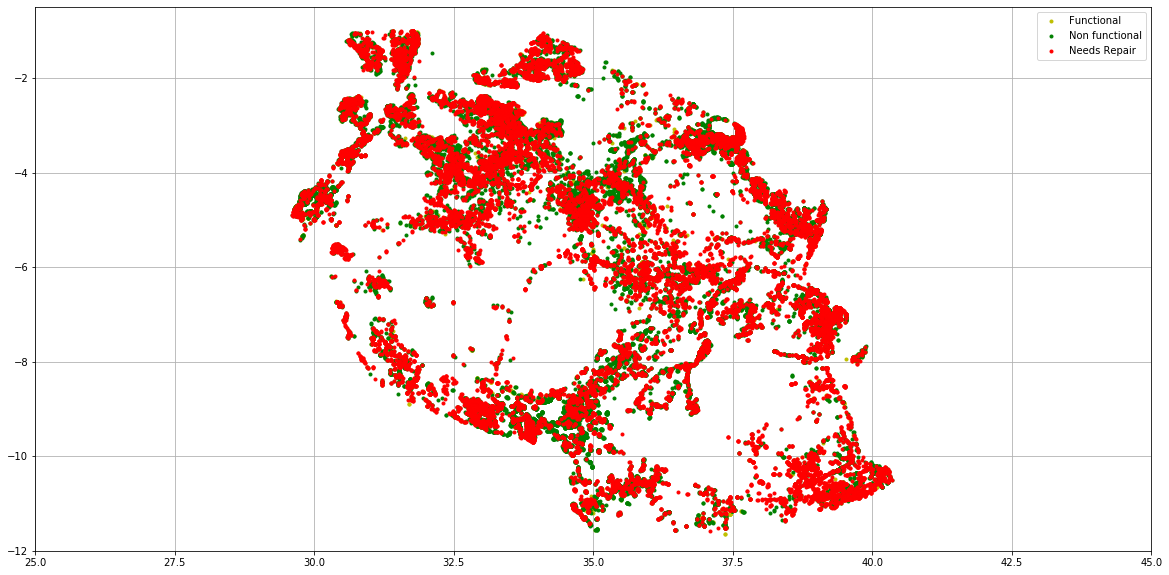

In [45]:
plt.figure(figsize=(20,10))
plt.plot(needs.longitude,needs.latitude,'y.')
plt.plot(functional.longitude,functional.latitude,'g.')
plt.plot(nonfunctional.longitude,nonfunctional.latitude,'r.')
plt.legend(['Functional','Non functional','Needs Repair'])
plt.axis([25,45,-12,-0.5])
plt.grid(True)

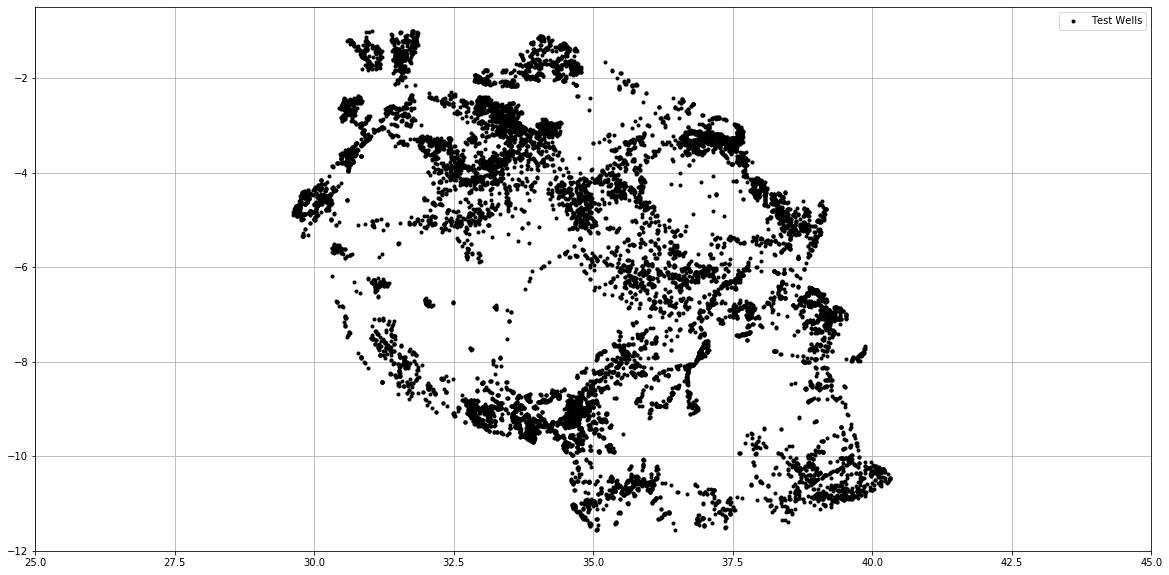

In [46]:
plt.figure(figsize=(20,10))
plt.plot(cleantest.longitude,cleantest.latitude,'k.')
plt.legend(['Test Wells'])
plt.axis([25,45,-12,-0.5])
plt.grid(True)

In [47]:
# True has by far the most so I'll fill with that
cleaneddf['public_meeting'].fillna(True,inplace=True)
cleantest['public_meeting'].fillna(True,inplace=True)
cleaneddf['permit'].fillna(True,inplace=True)
cleantest['permit'].fillna(True,inplace=True)

In [48]:
# 40 is an odd man out
df2['region_code'] = df2['region_code'].where(df2['region_code'] != 40, 11)
cleaneddf['region_code'] = cleaneddf['region_code'].where(cleaneddf['region_code'] != 40, 11)

In [49]:
encode([cleaneddf, cleantest], 'region_code')

In [50]:
# Abandoned wells are put in the same group
for x in alldfs:
    x.loc[x['water_quality'] == 'fluoride abandoned', 'water_quality'] = 'abandoned'
    x.loc[x['water_quality'] == 'salty abandoned', 'water_quality'] = 'abandoned'

In [51]:
encode([cleaneddf, cleantest], 'water_quality')

In [52]:
# Compares funder to installer, adds true if they are the same
for x in alldfs:
    x.loc[x['funder'] == 'government of tanzania', 'funder'] = 'government'
    x['selfbuilt'] = np.where(x.funder == x.installer, 0, 1)

In [53]:
drop = ['funder', 'installer']
cleaneddf.drop(drop, axis=1, inplace=True)
cleantest.drop(drop, axis=1, inplace=True)

In [54]:
cleaneddf['source_class'] = cleaneddf['source_class'].replace(['unknown'],'groundwater')
cleantest['source_class'] = cleantest['source_class'].replace(['unknown'],'groundwater')
cleaneddf['quantity'] = cleaneddf['quantity'].replace(['unknown'],'enough')
cleantest['quantity'] = cleantest['quantity'].replace(['unknown'],'enough')

In [55]:
toencode = ['quantity', 'source', 'source_type', 'source_class']

In [56]:
for col in toencode:
    encode([cleaneddf, cleantest], col)

In [57]:
cleaneddf['NaN Counts'] = df2.count(axis='columns')
cleantest['NaN Counts'] = testset2.count(axis='columns')

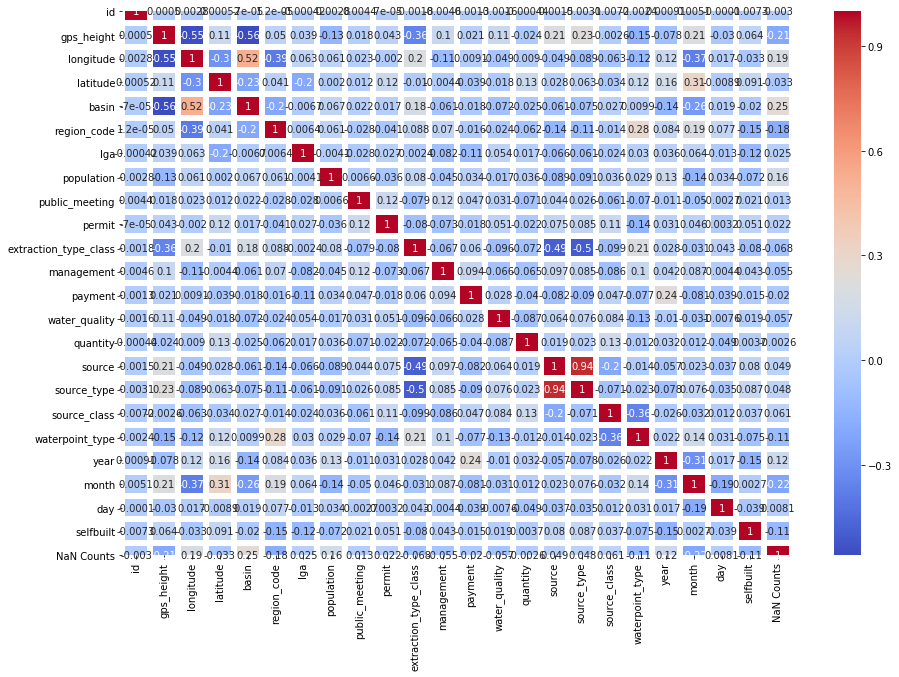

In [58]:
variables = cleaneddf.columns.to_list()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cleaneddf[variables].corr(), cmap='coolwarm', annot=True, linewidths=5, ax=ax);

In [59]:
# Source type will be better to drop than source
cleaneddf.drop('source_type', axis=1, inplace=True)
cleantest.drop('source_type', axis=1, inplace=True)

In [60]:
# Checking that they have the same number of columns, minus the labels
print(cleaneddf.shape)
print(cleantest.shape)

(59400, 24)
(14850, 23)


In [61]:
# Exporting to use a new page
cleaneddf.to_csv('cleaneddf.csv', index=False)
cleantest.to_csv('cleantest.csv', index=False)